In [1]:
import sys
sys.path.append('../bin')

import math
import json
import pandas as pd
import matplotlib.pyplot as plt
import constants as c

In [2]:
reports = c.DATA.joinpath('versions').glob('**/report.json')

report_data = dict()

for file in reports:
    with open(file, 'r') as f:
        data = json.loads(f.read())
        key = data['version']
        report_data[key] = data

## Error Rates Per Version

The table below shows mean error rates and model parameters per version. 

In [3]:
table = []

for version, report in report_data.items():
    row = {
        "version": version,
        "mean": report['results']['error_rates']['all']['mean'],
        "stddev": math.sqrt(report['results']['error_rates']['all']['variance']),
        "epochs": report['model']['epochs'],
        "size": report['model']['size'],
        "sg": report['model']['sg'],
        "train time": f"{round(report['model']['total_train_time'])}s",
        "vocab": report['model']['wv']['vocab_length'],
        "labeled": report['graph']['labeled_artists'],
        "topn": report['config']['topn'],
    }
    table.append(row)

df = pd.DataFrame.from_dict(table)

df.sort_values('mean', ascending=True)

,version,mean,stddev,epochs,size,sg,train time,vocab,labeled,topn
7,1.8.2,0.731169,0.400759,10,100,1,1337s,1011,415,2
15,1.9.2,0.757323,0.381546,8,100,0,895s,1011,415,2
18,1.8.1,0.777375,0.311037,10,100,1,1337s,1011,415,5
19,2.2.0,0.777560,0.348724,4,100,1,4699s,4481,1065,5
14,2.1.0,0.784135,0.327790,10,100,0,8509s,4481,1065,5
6,1.9.1,0.790879,0.303636,8,100,0,895s,1011,415,5
8,2.0.0,0.793170,0.323632,4,100,0,3559s,4481,1065,5
16,3.1.0,0.797092,0.275271,10,100,0,45s,866,1065,5
0,1.9,0.801539,0.251177,8,100,0,895s,1011,415,10
3,1.6,0.802802,0.246046,5,100,0,556s,1011,415,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b2cf390>]],
      dtype=object)

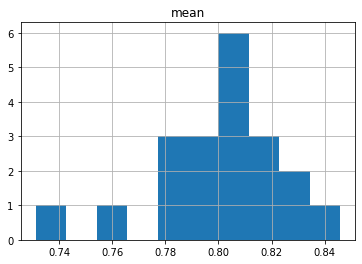

In [4]:
df.hist('mean')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c2e2650>]],
      dtype=object)

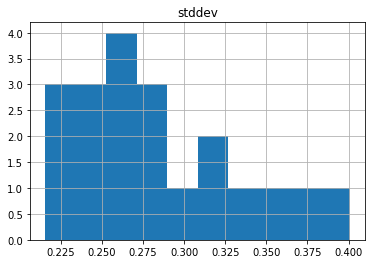

In [5]:
df.hist('stddev')

In [6]:
help(df.median)

Help on method median in module pandas.core.frame:

median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return the median of the values for the requested axis.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    **kwargs
        Additional keyword arguments to be passed to the function.
    
    Returns
    -------
    Series or DataFrame (if level specified)

